# 0 . début TP

enseignement
https://homepages.laas.fr/huguet/drupal/content/5-sdbd-ens

ressources git : https://github.com/deric/clustering-benchmark

## a) packages 

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import time

## b) jeux de données

### récupération des données

In [7]:
#1
data_1 = arff.loadarff(open("2d-10c.arff","r"))

#données tableau numpy complet
#print(data_1)

#données liste des abscisses // a1 pour les ordonnées
#data_1[0]['a0']

#nom du type de donnée pour les abscisses => 'a0'
#data_1[0].dtype.names[0]
data_1

(array([( 1.00007 , 40.9378, b'0'), ( 0.99736 , 41.1714, b'0'),
        ( 0.134799, 41.8113, b'0'), ..., (96.8852  , 68.1787, b'9'),
        (96.834   , 67.9841, b'9'), (98.4335  , 68.2043, b'9')],
       dtype=[('a0', '<f8'), ('a1', '<f8'), ('CLASS', 'S1')]),
 Dataset: 2d-10c
 	a0's type is numeric
 	a1's type is numeric
 	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))

In [8]:
import csv
def csv_to_list(file):
  liste_data = []
  with open(file , 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        liste_data.append([float(row[0]),float(row[1])])
        
  return liste_data

In [9]:
#autre données téléchargées
data_2 = arff.loadarff(open("2d-4c-no9.arff","r"))
data_3 = arff.loadarff(open("aggregation.arff","r"))
data_4 = arff.loadarff(open("complex8.arff","r"))
data_5 = arff.loadarff(open("D31.arff","r"))
data_6 = arff.loadarff(open("banana.arff","r"))
data_7 = arff.loadarff(open("compound.arff","r"))
data_8 = arff.loadarff(open("cure-t2-4k.arff","r"))
data_9 = arff.loadarff(open("disk-6000n.arff","r"))
data_10 = arff.loadarff(open("zelnik4.arff","r"))

data_11 = arff.loadarff(open("3MC.arff","r"))
data_12 = arff.loadarff(open("cure-t0-2000n-2D.arff","r"))
data_13 = arff.loadarff(open("diamond9.arff","r"))
data_14 = arff.loadarff(open("ds2c2sc13.arff","r"))
data_15 = arff.loadarff(open("fourty.arff","r"))
data_16 = arff.loadarff(open("curves1.arff","r"))
data_17 = arff.loadarff(open("sizes3.arff","r"))
data_18 = arff.loadarff(open("triangle1.arff","r"))

data_21 = csv_to_list('x1.csv')
data_22 = csv_to_list('x2.csv')
data_23 = csv_to_list('x3.csv')
data_24 = csv_to_list('x4.csv')
data_25 = csv_to_list('y1.csv')


data_31 = arff.loadarff(open("iris.arff","r"))
# 32 --> Balance Left Right 
data_32 = arff.loadarff(open("balance-scale.arff","r"))

### rangement des données

In [10]:
#format données
#(title , ndarray data_x , nb_clusters , gap , min_size)

# nb_clusters : attendu (bruit y compris)

# valeurs pour tester:
# gap : dbscan => rayon du voisinage d'un point
# min_size : dbscan => nb min de points dans un voisinage pour considérer le point dans un cluster, et pas comme du bruit

#  (idem hdbscan)

list_data = dict()
list_data["data_1"]=("2d-10c", data_1, 9, 5.8, 65)
list_data["data_2"]=("2d-4c-no9", data_2, 4, 3, 20)
list_data["data_3"]=("aggregation", data_3, 7, 2, 15)
list_data["data_4"]=("complex8", data_4, 8, 20, 10) 
list_data["data_5"]=("D31", data_5, 31, 2, 20)
list_data["data_6"]=("banana", data_6, 2, 0.05, 10) #OK ----------------
list_data["data_7"]=("compound", data_7, 6, 2.2, 15)
list_data["data_8"]=("cure-t2-4k", data_8, 7, 0.1, 20)
list_data["data_9"]=("disk-6000n", data_9, 2, 0.09, 40) #plante à 0.15 avec dbscan
list_data["data_10"]=("zelnik4", data_10, 5, 0.028, 20)#OK -------------------------

list_data["data_11"]=("3MC", data_11, 3, 1, 4)  #OK -------------------------
list_data["data_12"]=("cure-t0-2000n-2D", data_12, 3, 0.25, 10)  #OK -------------------------
list_data["data_13"]=("diamond9", data_13, 9, 0.2, 30)
list_data["data_14"]=("ds2c2sc13", data_14, 13, 0.1, 7)
list_data["data_15"]=("fourty", data_15, 40, 1.4, 5) #OK -------------------------
list_data["data_16"]=("curves1", data_16, 2, 0.05, 10) #OK -------------------------
list_data["data_17"]=("sizes3", data_17, 4, 1.1, 7)
list_data["data_18"]=("triangle1", data_18, 4, 2.3, 6) #OK -------------------------



#nb de clusters estimé par la suite de l'évaluation par métriques

list_data["data_21"]=("x1", data_21, 15, 52000, 60)
list_data["data_22"]=("x2", data_22, 15, 40000, 100)
list_data["data_23"]=("x3", data_23, 15, 15000, 60)
list_data["data_24"]=("x4", data_24, 15, 15000, 60)
list_data["data_25"]=("y1", data_25, 29,100,400)

## c) affichage des données

### fonctions

In [11]:
#fonction pour le dataset x1 etc
def abs_ord(data_liste):
  abs = []
  ord = []

  size = len(data_liste)
  for i in range(size):
    abs.append(data_liste[i][0])
    ord.append(data_liste[i][1])
  return [abs, ord]

In [12]:
#plt.figure(figsize=(4, 4))

def afficher_points(data, title):
  abs = data[0].dtype.names[0]
  ord = data[0].dtype.names[1]
  plt.scatter(data[0][abs], data[0][ord], marker='o')
  plt.title(title)
  plt.show()

def afficher_graphes(list_num):
  for num in list_num:
    name = "data_" + str(num)
    title = name + " : " + list_data[name][0]
    afficher_points(list_data[name][1], title)

def afficher_points_multi_graphes(axes, data, title):
  if isinstance(data, tuple):
    abs = data[0].dtype.names[0]
    ord = data[0].dtype.names[1]
    axes.scatter(data[0][abs], data[0][ord], marker='o')
  elif isinstance(data, list):
    a_o = abs_ord(data)
    axes.scatter(a_o[0], a_o[1], marker='o')
  axes.set_title(title)

def print_all_data():
  figure = plt.figure(figsize = (50, 100))
  u = 1
  for key, info in list_data.items():

    name = key

    title = name + " : " + info[0]
  
    axes = figure.add_subplot(8, 4, u)
    u = u+1

    afficher_points_multi_graphes(axes, info[1], title)

  plt.show()
  plt.close()

### application [tests]

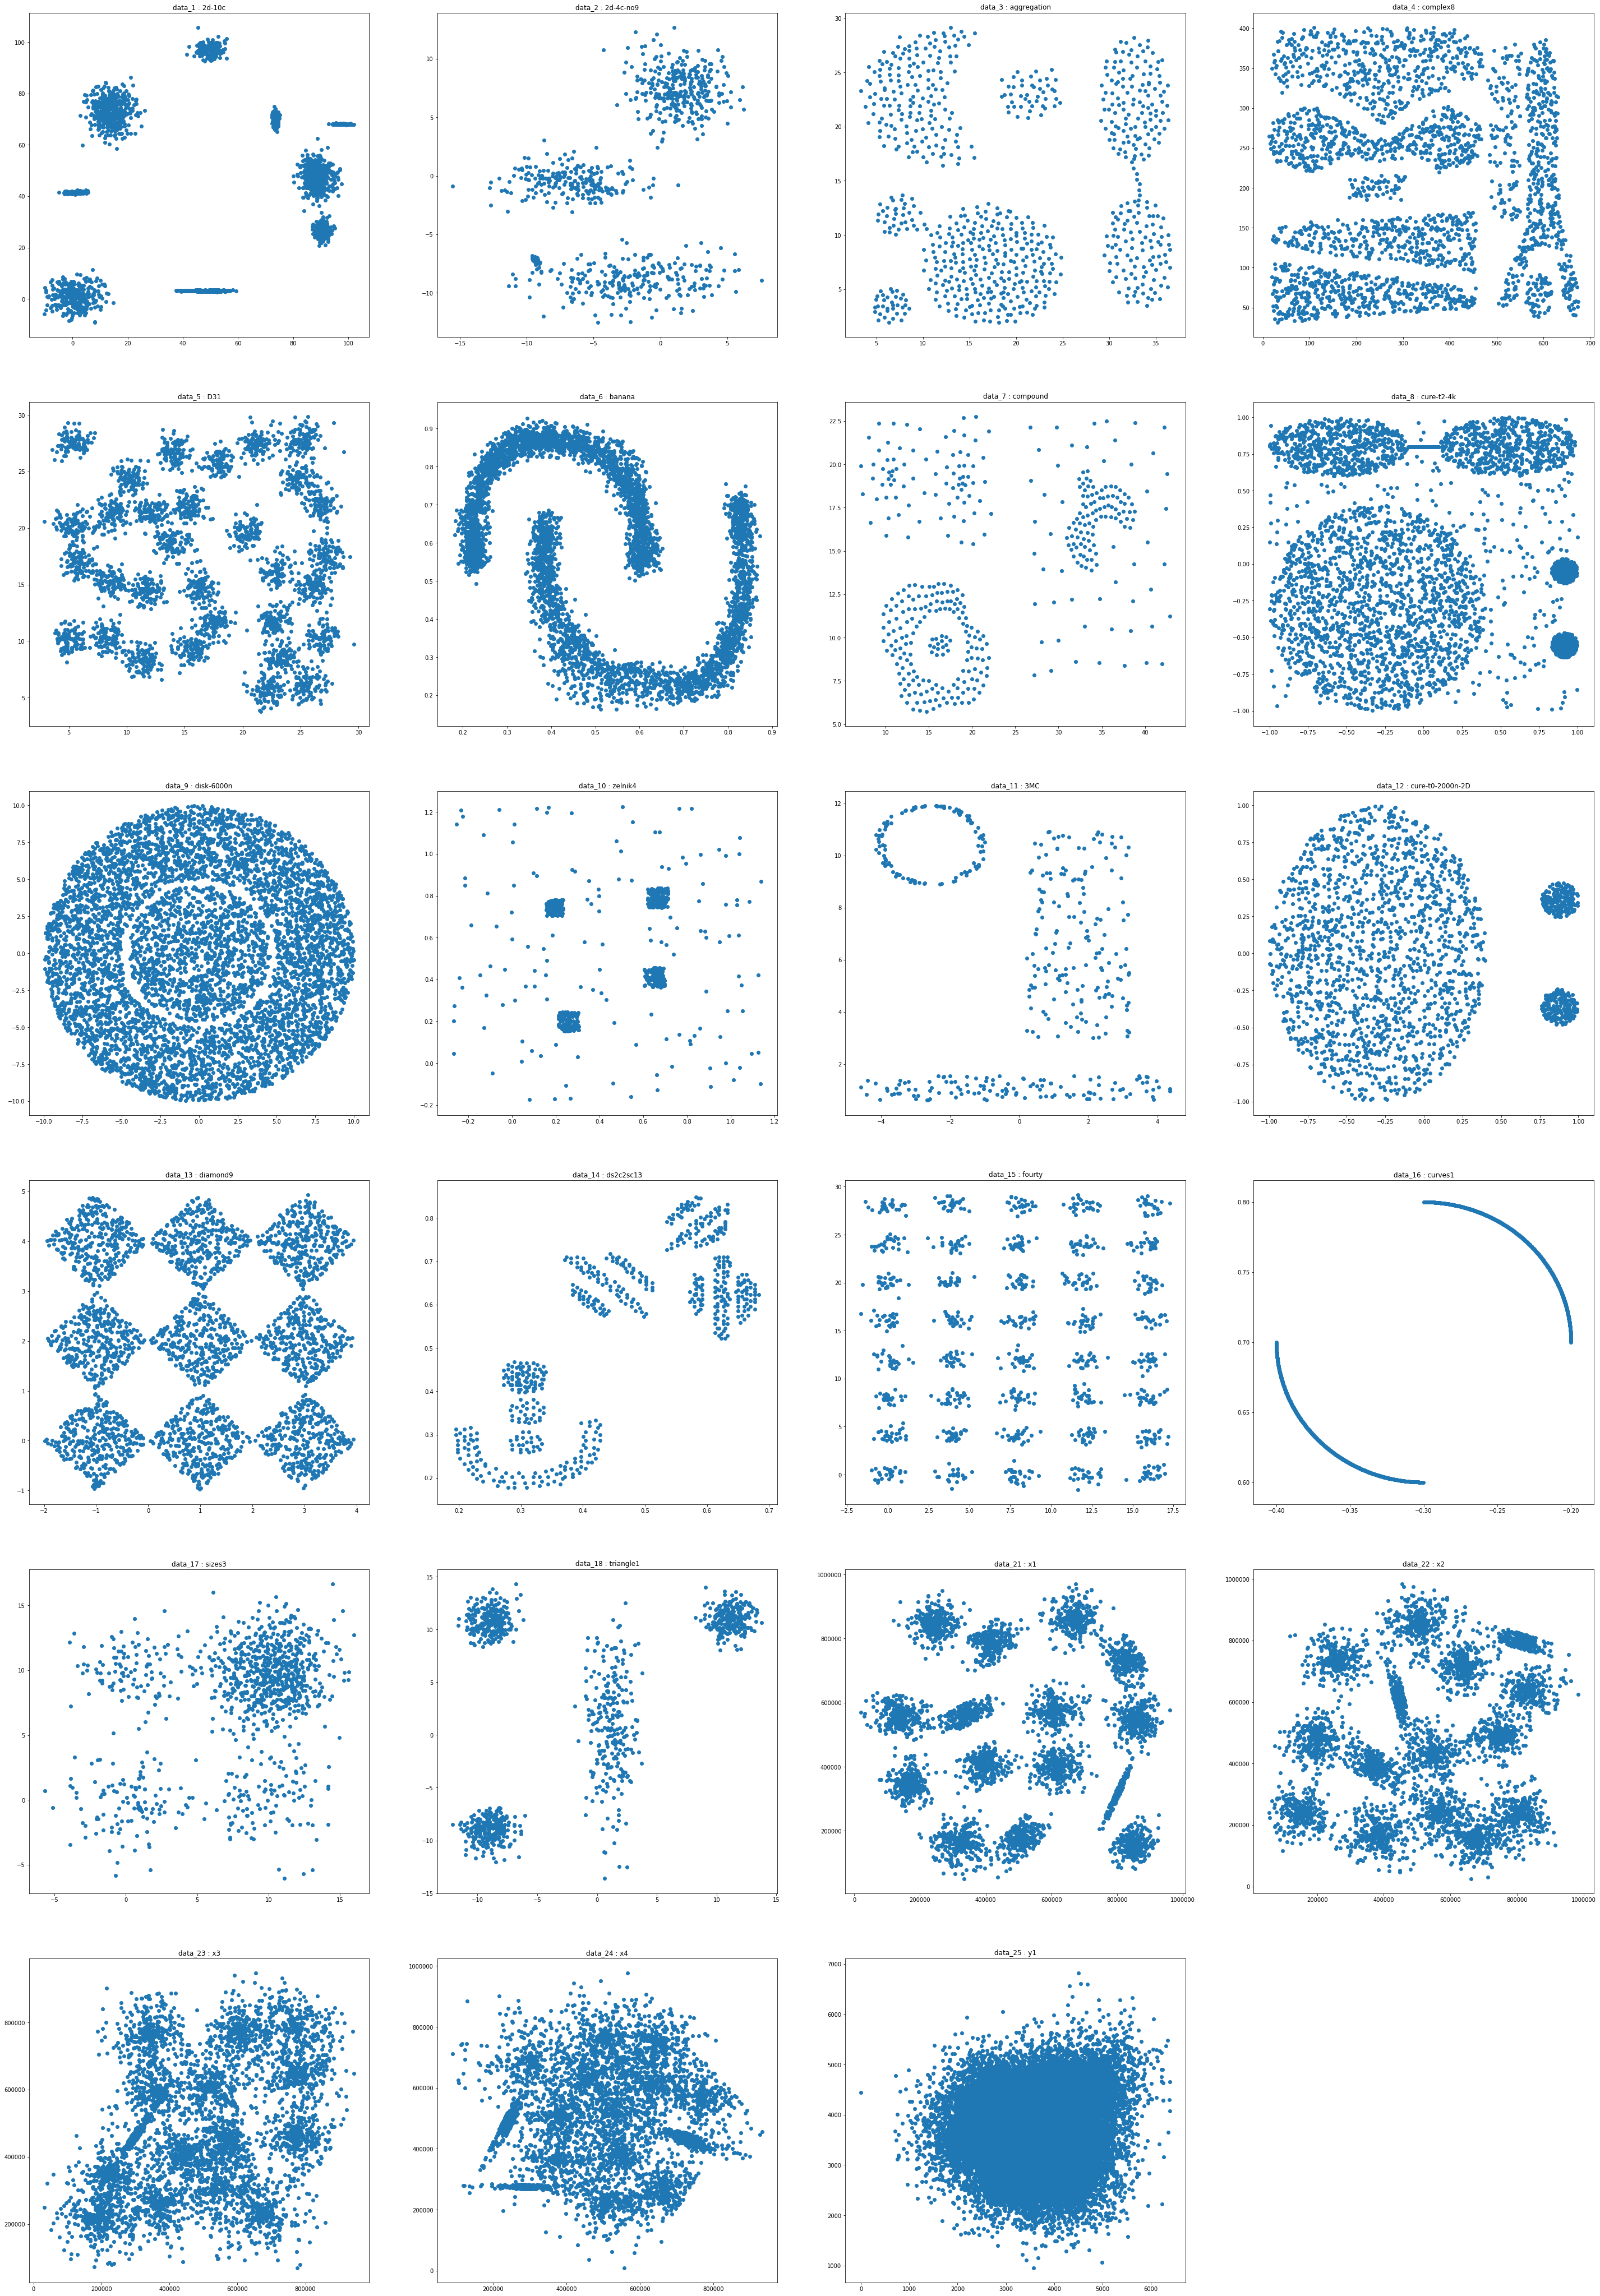

In [13]:
#choix à afficher >= 1
selected_test = (6, 9, 10)
#afficher_graphes(selected_test)
#--------------------------------
#plt.figure(figsize=(10, 10))
#afficher_points(data_9, "num 9")
#--------------------------------
print_all_data()

## d) Outils pour les calculs
liste_points(data) // liste_colors // import metrics // print_result(result, title) // print_multi_result(axes, result, title)

In [14]:
#pour obtenir avec le dataset balance-scale la liste des numéros de clusters pour chaque point
def extract_clusters(data):
  list_names = data[0]['class']
  list_num = []

  size = len(list_names)
  for i in range(size):
    ele = list_names[i]
    if ele == b'R':
      list_num.append(0)
    elif ele == b'B':
      list_num.append(1)
    else:
      list_num.append(2)
  return list_num


In [15]:
#retourne pour chaque dataset une liste des paires des coordonnées de chaque point
def liste_points(data):
  if isinstance(data, tuple):
    abs = data[0].dtype.names[0]
    ord = data[0].dtype.names[1]
    length = len(data[0][abs])

    liste = []
    for i in range(0, length):
      x = data[0][abs][i]
      y = data[0][ord][i]
      liste.append([x,y])
  elif isinstance(data, list):
    liste = data
  return liste

liste_colors = [ 'b', 'gray', 'orange', 'g', 'r', 'c', 'm', 'brown', 'y', 'k',
                'palegreen', 'crimson', 'teal', 'gold', 'sienna', 'tomato', 'darkolivegreen', 'lightgray','magenta', 'mediumpurple',
                'pink', 'steelblue', 'khaki', 'coral', 'maroon', 'limegreen', 'peru', 'lemonchiffon', 'salmon', 'royalblue',
                'navy', 'rosybrown', 'moccasin', 'midnightblue', 'indianred', 'mediumseagreen', 'olivedrab', 'darkorchid', 'indigo', 'firebrick','b', 'gray', 'orange', 'g', 'r', 'c', 'm', 'brown', 'y', 'k',
                'palegreen', 'crimson', 'teal', 'gold', 'sienna', 'tomato', 'darkolivegreen', 'lightgray','magenta', 'mediumpurple',
                'pink', 'steelblue', 'khaki', 'coral', 'maroon', 'limegreen', 'peru', 'lemonchiffon', 'salmon', 'royalblue',
                'navy', 'rosybrown', 'moccasin', 'midnightblue', 'indianred', 'mediumseagreen', 'olivedrab', 'darkorchid', 'indigo', 'firebrick']

from sklearn import metrics

In [16]:
#result est une liste des clusters qui contiennent chacun une liste de points
def print_result(result, title):
  size = len(result)
  plt.figure(figsize=(10, 10))
  for i in range(size):
    abs = result[i][0]
    ord = result[i][1]

    plt.scatter(abs, ord, marker='o', c=liste_colors[i], s=0.3)
  
  plt.title(title)
  plt.show()

#utilisé notamment avec agglo
def print_multi_result(axes, result, title):
  size = len(result)
  axes.set_title(title)
  for i in range(size):
    abs = result[i][0]
    ord = result[i][1]
    axes.scatter(abs, ord, marker='o', c=liste_colors[i])

    

# 1 . Clustering k-Means

In [17]:
from sklearn.cluster import KMeans

## a) application de k-means
avec le bon nombre de clusters pour chaque jeu de données

In [18]:
#choix des donnnées
selected_kmeans = [1,2,3]

### fonctions

In [19]:
#return : liste de taille (nb clusters)
#chaque élément : un tuple (liste_abscisses,liste_ordonnées)
def result_kmeans(nb_clusters, data):
  result = []
  for i in range(nb_clusters):
    result.append(([],[]))

  data_points = liste_points(data)
  size = len(data_points)

  kmeans = KMeans(n_clusters=nb_clusters, random_state=0)
  liste_clusters_donnés = kmeans.fit_predict(data_points)

  for i in range(size):
    num = liste_clusters_donnés[i]
    result[num][0].append(data_points[i][0])
    result[num][1].append(data_points[i][1])
  
  return result

def apply_kmeans(selected):
  for i in selected:
    name = list_data["data_"+str(i)][0]
    d = list_data["data_"+str(i)][1]
    nc = list_data["data_"+str(i)][2]
    start_time = time.time()
    result_x = result_kmeans(nc, d)
    print_result(result_x, "kmeans : data_" + str(i) + "  " + name + " - nb_clusters = " + str(nc))
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))

### application [test]

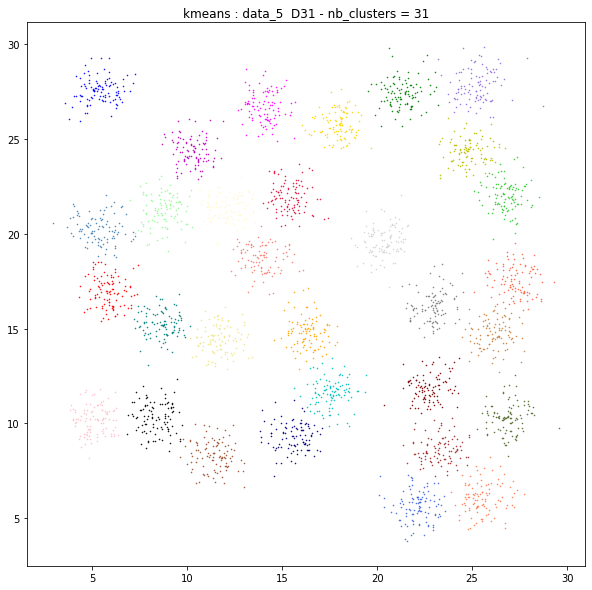

Temps d execution : 0.9888696670532227 secondes ---


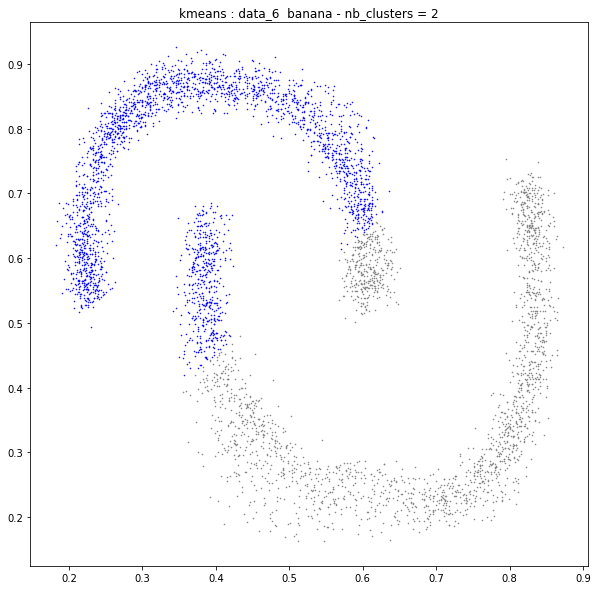

Temps d execution : 0.6941697597503662 secondes ---


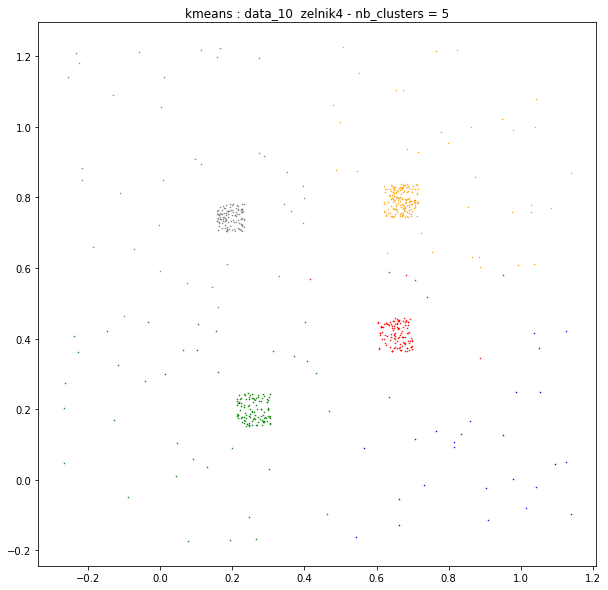

Temps d execution : 0.48379993438720703 secondes ---


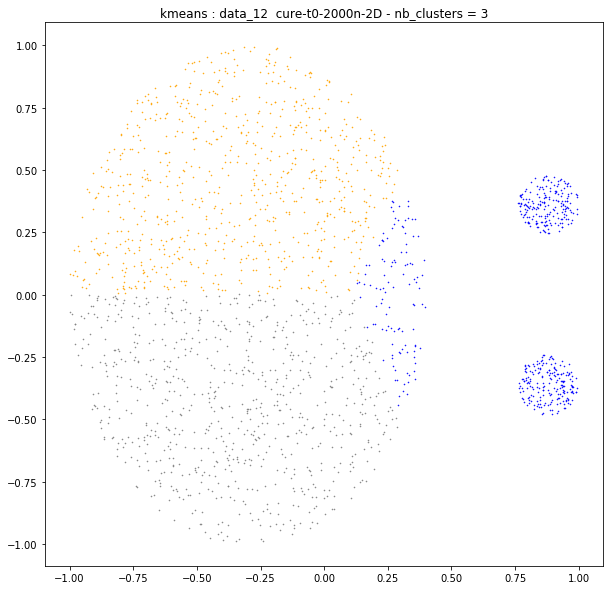

Temps d execution : 0.668433666229248 secondes ---


In [20]:
selected_kmeans = [5,6,10,12]
apply_kmeans(selected_kmeans)

## b) application de k-means avec métriques
pour trouver le nb de clusters

### fonctions

In [21]:
#data = liste_points(data_x)
def calcul_metriques_kmeans(liste_nb_clusters, data, div_calinski):
  #noms et resultats des metriques
  m = [['',[]], ['',[]], ['',[]]]

  m[0][0] = 'Silhouette Coefficient'
  m[1][0] = 'Calinski-Harabasz Index / ' + str(div_calinski)
  m[2][0] = 'Davies-Bouldin Index'

  for nb_clusters in liste_nb_clusters:
    kmeans = KMeans(n_clusters=nb_clusters, random_state=0)
    kmeans_model = kmeans.fit(data)
    labels = kmeans_model.labels_

    #2.3.10.5. Silhouette Coefficient
    m1 = metrics.silhouette_score(data, labels, metric='euclidean')

    #2.3.10.6. Calinski-Harabasz Index
    m2 = metrics.calinski_harabasz_score(data, labels)/div_calinski

    #2.3.10.7. Davies-Bouldin Index
    m3 = metrics.davies_bouldin_score(data, labels)

    m[0][1].append(m1)
    m[1][1].append(m2)
    m[2][1].append(m3)
  return m

#data = data_x
def print_metriques(metriques, liste_nb_clusters, title):
  size = len(metriques)
  for i in range(size):
    abs = liste_nb_clusters
    ord = metriques[i][1]
    leg = metriques[i][0]
    plt.plot(abs, ord, marker='o', c=liste_colors[i], label=leg)
  plt.legend()
  plt.title(title)
  plt.show()

### application

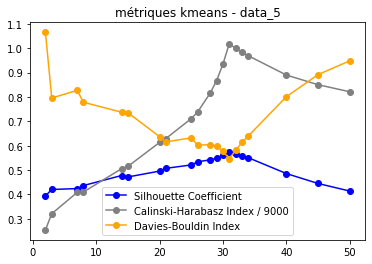

In [22]:
#data_5
#objectif : 31 clusters
l_clusters_to_test = [2, 3, 7, 8, 14, 15, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 34, 40, 45, 50]
data_points = liste_points(data_5)
m = calcul_metriques_kmeans(l_clusters_to_test, data_points, 9000)
#print_metriques(m, l_clusters_to_test, "métriques kmeans - data_5")

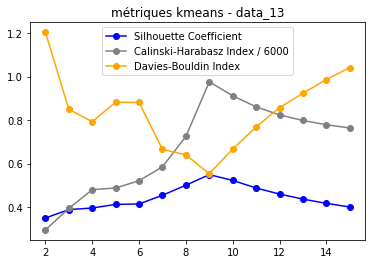

In [23]:
#data_13
#objectif : 9 clusters
l_clusters_to_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
data_points = liste_points(data_13)
m = calcul_metriques_kmeans(l_clusters_to_test, data_points, 6000)
print_metriques(m, l_clusters_to_test, "métriques kmeans - data_13")

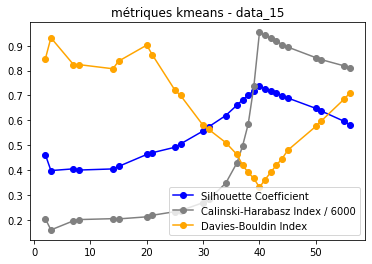

In [24]:
#data_15
#objectif : 40 clusters
l_clusters_to_test = [2, 3, 7, 8, 14, 15, 20, 21, 25, 26, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 55, 56]
data_points = liste_points(data_15)
m = calcul_metriques_kmeans(l_clusters_to_test, data_points, 6000)
#print_metriques(m, l_clusters_to_test, "métriques kmeans - data_15")

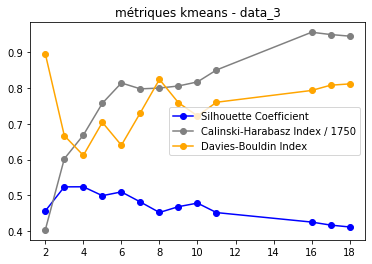

In [25]:
#data_3
#objectif : 7 clusters
l_clusters_to_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18]
data_points = liste_points(data_3)
m = calcul_metriques_kmeans(l_clusters_to_test, data_points, 1750)
#print_metriques(m, l_clusters_to_test, "métriques kmeans - data_3")

# 2 Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

## a) application de agglomerative clustering
avec le bon nb de clusters

In [27]:
type_linkage=['ward', 'complete', 'average', 'single']
#type_linkage = ['single']
#selected_agglo = [10] => choix des dataset pour l'application

### fonctions

In [28]:
def result_aggloClust(nb_clusters, data, link):
  result = []
  for i in range(nb_clusters):
    result.append(([],[]))

  data_points = liste_points(data)
  size = len(data_points)

  aggloClust = AgglomerativeClustering(n_clusters=nb_clusters, affinity='euclidean', linkage=link)
  liste_clusters_donnes = aggloClust.fit_predict(data_points)

  nb_clusters = max(liste_clusters_donnes) + 1

  for i in range(size):
    num = liste_clusters_donnes[i]
    result[num][0].append(data_points[i][0])
    result[num][1].append(data_points[i][1])
  
  return result,nb_clusters

def apply_aggloClust(selected):
  f = 0
  for i in selected:
    f = f+1
    figure = plt.figure(num = f, figsize = (25, 5))

    name = list_data["data_"+str(i)][0]
    d = list_data["data_"+str(i)][1]
    nc = list_data["data_"+str(i)][2]

    for link in range(4):
      axes = figure.add_subplot(1, 4, link+1)
      start_time = time.time()
      result_x,nb_found = result_aggloClust(nc, d, type_linkage[link])
      print("Temps d execution : %s secondes ---" % (time.time() - start_time))
      print_multi_result(axes, result_x, "agglo : data_" + str(i) + "  " + name + " - nb_clu = " + str(nc) +  " - linkage = " + type_linkage[link])

  

    #result_x,nb_found = result_aggloClust(nc, d, 'single')
    #print_result(result_x, "agglo : data_" + str(i) + "  " + name + " - nb_clu = " + str(nc) +  " - linkage = " + 'single')
    
    plt.show()
    plt.close()

### application

Temps d execution : 0.4674859046936035 secondes ---
Temps d execution : 0.3182055950164795 secondes ---
Temps d execution : 0.34764814376831055 secondes ---
Temps d execution : 0.10146260261535645 secondes ---


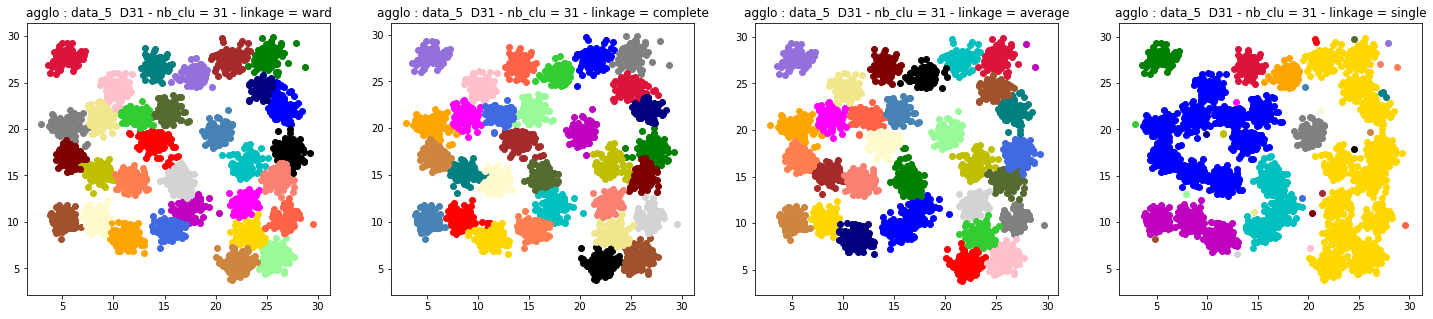

Temps d execution : 1.0165088176727295 secondes ---
Temps d execution : 0.708319902420044 secondes ---
Temps d execution : 0.6984715461730957 secondes ---
Temps d execution : 0.18441557884216309 secondes ---


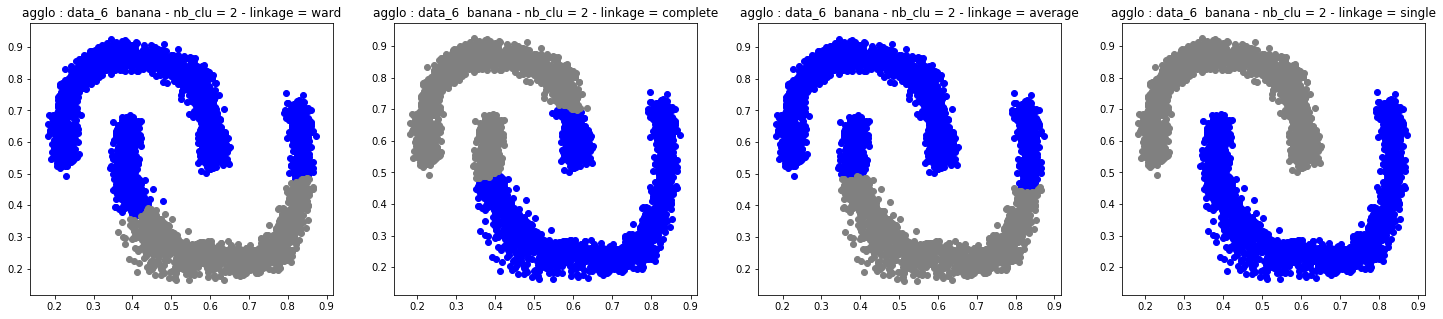

Temps d execution : 0.016313552856445312 secondes ---
Temps d execution : 0.011463403701782227 secondes ---
Temps d execution : 0.015096664428710938 secondes ---
Temps d execution : 0.012333154678344727 secondes ---


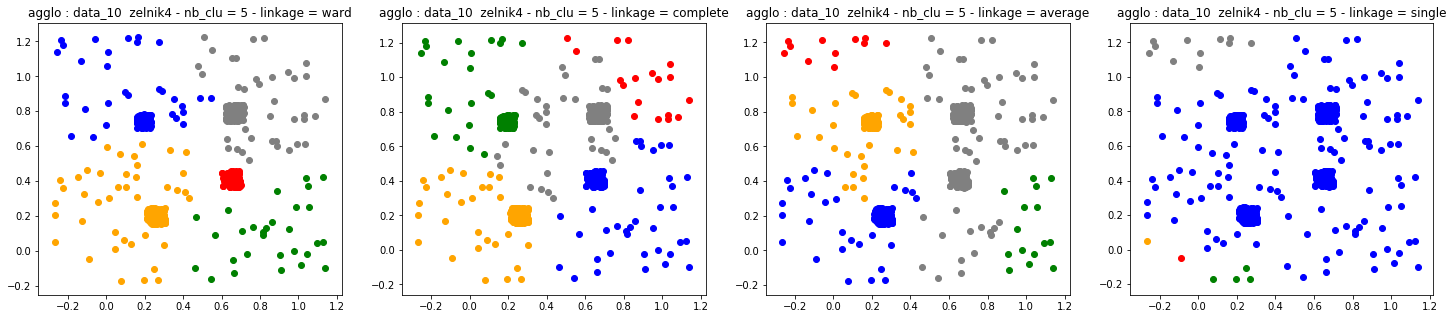

Temps d execution : 0.17749667167663574 secondes ---
Temps d execution : 0.1367204189300537 secondes ---
Temps d execution : 0.23515558242797852 secondes ---
Temps d execution : 0.04898238182067871 secondes ---


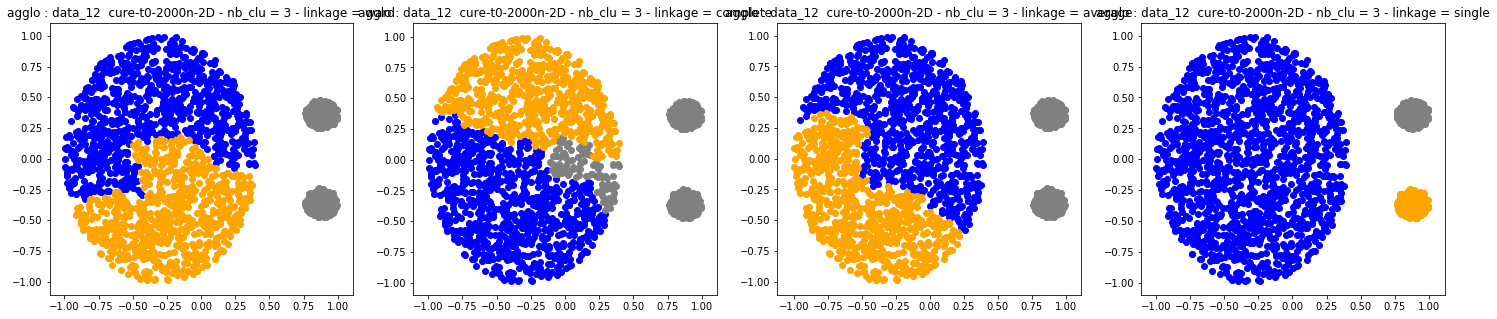

In [29]:
selected_agglo = [5,6,10,12]

apply_aggloClust(selected_agglo)

## b) application de agglomérative avec métriques
pour trouver le bon nb de clusters

### fonctions

In [30]:
#data = liste_points(data_x)
def calcul_metriques_agglo(liste_nb_clusters, data, link, div_calinski):
  #noms et resultats des metriques
  m = [['',[]], ['',[]], ['',[]]]

  m[0][0] = 'Silhouette Coefficient'
  m[1][0] = 'Calinski-Harabasz Index / ' + str(div_calinski)
  m[2][0] = 'Davies-Bouldin Index'

  for nb_clusters in liste_nb_clusters:
    
    aggloClust = AgglomerativeClustering(n_clusters=nb_clusters, affinity='euclidean', linkage=link)
    aggloClust_model = aggloClust.fit(data)
    labels = aggloClust_model.labels_

    #2.3.10.5. Silhouette Coefficient
    m1 = metrics.silhouette_score(data, labels, metric='euclidean')

    #2.3.10.6. Calinski-Harabasz Index
    m2 = metrics.calinski_harabasz_score(data, labels)/div_calinski

    #2.3.10.7. Davies-Bouldin Index
    m3 = metrics.davies_bouldin_score(data, labels)

    m[0][1].append(m1)
    m[1][1].append(m2)
    m[2][1].append(m3)
  return m

#data = data_x
def print_multi_metriques(axes, metriques, liste_nb_clusters, title):
  size = len(metriques)
  for i in range(size):
    abs = liste_nb_clusters
    ord = metriques[i][1]
    leg = metriques[i][0]
    axes.plot(abs, ord, marker='o', c=liste_colors[i], label=leg)
  axes.legend()
  axes.set_title(title)


#num_data = x in data_x
def print_all_metriques(num_data, l_clusters_to_test, div):
  figure = plt.figure(figsize = (25, 5))

  d = list_data["data_"+str(num_data)][1]
  data_points = liste_points(d)

  for link in range(4):
    axes = figure.add_subplot(1, 4, link+1)
    
    m = calcul_metriques_agglo(l_clusters_to_test, data_points, type_linkage[link], div)
    title = "métriques agglo : data_" + str(num_data) + " - linkage = " + type_linkage[link]
    print_multi_metriques(axes, m, l_clusters_to_test, title)
    
  plt.show()
  plt.close()

### application

In [31]:
#data_6
#objectif : 2 clusters (pour SINGLE)
l_clusters = [2,3, 4, 5, 6, 10, 12, 17, 18]
#print_all_metriques(6, l_clusters, 8000)

In [32]:
#data_12
#objectif : 3 clusters POUR SINGLE
l_clusters = [2,3, 4, 5, 6, 10, 12, 17, 18]
#print_all_metriques(12, l_clusters, 8000)

In [33]:
#data_1
#objectif : 9 clusters
l_clusters = [2, 4, 5, 6, 7, 8, 9, 10, 11, 17, 18]
#print_all_metriques(1, l_clusters, 12000)


# 3 DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html

In [34]:
from sklearn.cluster import DBSCAN

## a) application de dbscan

### fonctions

In [35]:
def result_dbscan(data, gap, min_size):
  data_points = liste_points(data)
  size = len(data_points)

  dbscan_model = DBSCAN(eps=gap, min_samples=min_size)
  liste_clusters_donnes = dbscan_model.fit_predict(data_points)

  nb_clusters = max(liste_clusters_donnes) + 1
  noise_exist = (min(liste_clusters_donnes) == -1)

  if noise_exist:
    nb_clusters+=1
    print("bruit")

  result = []
  for i in range(nb_clusters):
    result.append(([],[]))

  for i in range(size):
    num = liste_clusters_donnes[i]
    #print(num) = -1 ??
    result[num][0].append(data_points[i][0])
    result[num][1].append(data_points[i][1])
  
  return (result, nb_clusters)

def print_result_dbscan(result, title):
  #plt.figure(figsize=(15, 15))
  size = len(result)
  for i in range(size):
    abs = result[i][0]
    ord = result[i][1]
    plt.scatter(abs, ord, marker='o', c=liste_colors[i], s= 0.2)
  plt.title(title)
  plt.show()


def apply_dbscan():
  for i in selected_dbscan:
    name = list_data["data_"+str(i)][0]
    d = list_data["data_"+str(i)][1]
    nc = list_data["data_"+str(i)][2]

    gap = list_data["data_"+str(i)][3]
    min_size = list_data["data_"+str(i)][4]

    start_time = time.time()

    (result_x , nc_found) = result_dbscan(d, gap, min_size)
    print_result_dbscan(result_x, "dbscan : " + name + " - nb_cl = " + str(nc) + " - nc_found = " + str(nc_found) + " eps = " + str(gap) + " min_size = " + str(min_size))
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))



### application

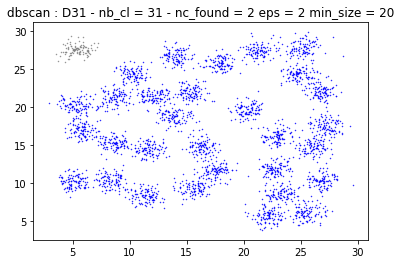

Temps d execution : 0.411327600479126 secondes ---


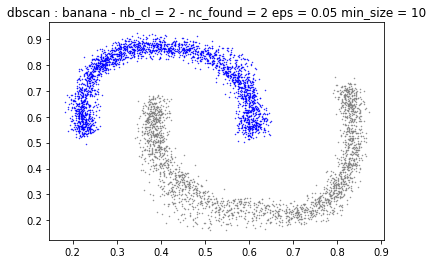

Temps d execution : 0.5346391201019287 secondes ---
bruit


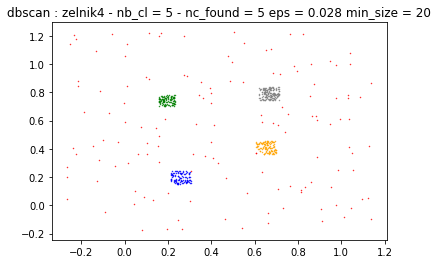

Temps d execution : 0.3437168598175049 secondes ---


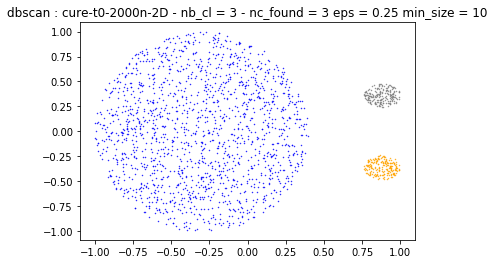

Temps d execution : 0.42021727561950684 secondes ---


In [36]:
#OK : 6, 10, 11, 12, 15, 16, 18
selected_dbscan = [5,6,10,12]
apply_dbscan()

## b) test x1, x2, x3, x4


bruit


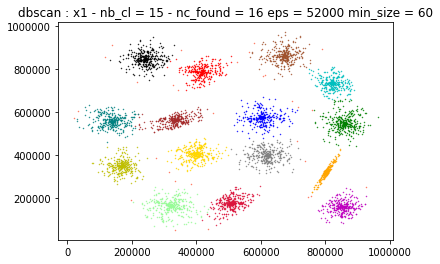

Temps d execution : 0.7766921520233154 secondes ---
bruit


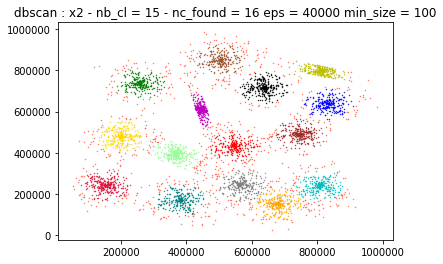

Temps d execution : 1.298480749130249 secondes ---
bruit


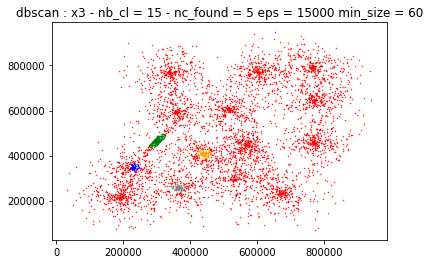

Temps d execution : 0.6909599304199219 secondes ---
bruit


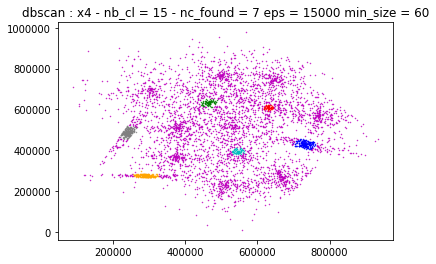

Temps d execution : 0.711188793182373 secondes ---


In [39]:
selected_dbscan = [21,22,23,24]
apply_dbscan()

# 4 HDBSCAN

n'utilise PAS le paramètre gap

## a) fonctions 

In [2]:
#run la ligne suivante si pbm d'installation de hdbscan
#pip install --upgrade pip

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.5MB 378kB/s ta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
  Using cached hdbscan-0.8.26.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached Cython-0.29.21-cp36-cp36m-manylinux1_x86_64.whl (2.0 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301937 sha256=2bc1efdf1e966b52e1bdf2b6779a26c1b57b0e5e30aa0911ca2c9784c7ef3146
  Stored in directory: /home/marie/.cache/pip/wheels/36/20/d1/521b2fbf637de5bc40668b6445944e7e44bfbe68fdaa65157d
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


In [4]:
import hdbscan

In [37]:

def result_hdbscan(data, min_size):
  data_points = liste_points(data)
  size = len(data_points)

  hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_size)
  liste_clusters_donnes = hdbscan_model.fit_predict(data_points)

  nb_clusters = max(liste_clusters_donnes) + 1
  noise_exist = (min(liste_clusters_donnes) == -1)


  if noise_exist:
    nb_clusters+=1
    print("bruit")

  result_hdb = []
  for i in range(nb_clusters):
    result_hdb.append(([],[]))

  for i in range(size):
    num = liste_clusters_donnes[i]
    result_hdb[num][0].append(data_points[i][0])
    result_hdb[num][1].append(data_points[i][1])
  
  return (result_hdb, nb_clusters)

def print_result_hdbscan(result_hdb, title):
  #plt.figure(figsize=(15, 15))
  size = len(result_hdb)
  for i in range(size):
    abs = result_hdb[i][0]
    ord = result_hdb[i][1]
    plt.scatter(abs, ord, marker='o', c=liste_colors[i], s=0.3)
  plt.title(title)
  plt.show()


def apply_hdbscan():
  for i in selected_hdbscan:
    name = list_data["data_"+str(i)][0]
    d = list_data["data_"+str(i)][1]
    nc = list_data["data_"+str(i)][2]

    min_size = list_data["data_"+str(i)][4]
    

    start_time = time.time()

    (result_x , nc_found) = result_hdbscan(d, min_size)
    print_result_hdbscan(result_x, "hdbscan : " + name + " - nb_cl = " + str(nc) + " - nc_found = " + str(nc_found) + " min_size = " + str(min_size))
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))



## b) tests dataset git


bruit


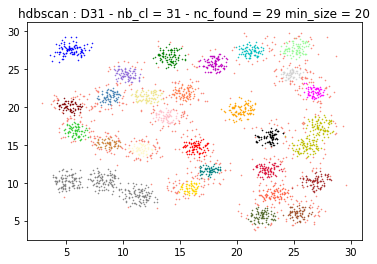

Temps d execution : 0.6730306148529053 secondes ---


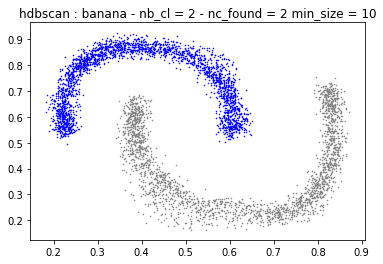

Temps d execution : 0.7150106430053711 secondes ---
bruit


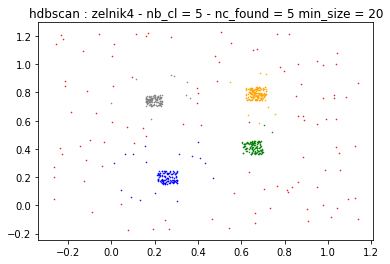

Temps d execution : 0.517845869064331 secondes ---


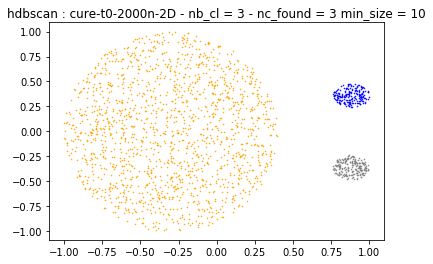

Temps d execution : 0.6485483646392822 secondes ---


In [38]:
selected_hdbscan = [5,6,10,12]

apply_hdbscan()

## b) tests x1,x2,x3,x4, y1

bruit


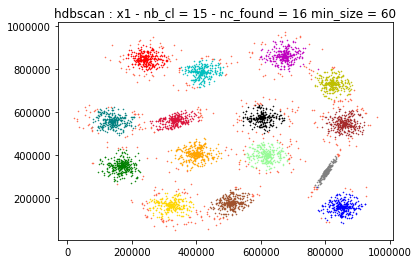

Temps d execution : 1.0178487300872803 secondes ---
bruit


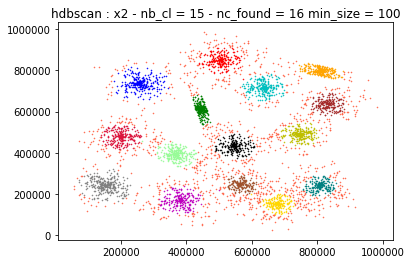

Temps d execution : 0.9962742328643799 secondes ---
bruit


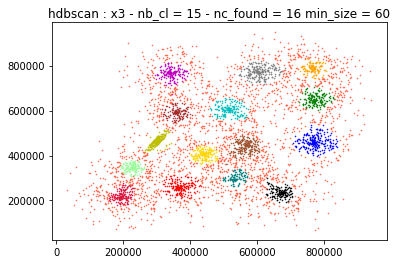

Temps d execution : 1.1268291473388672 secondes ---
bruit


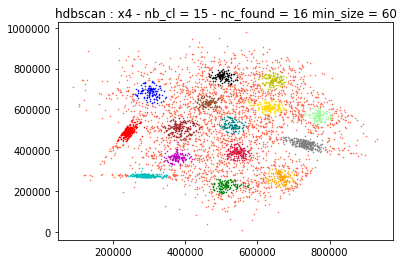

Temps d execution : 0.780418872833252 secondes ---


In [39]:
selected_hdbscan = [21,22,23,24]
apply_hdbscan()

# 5 Synthèse : dataset ajoutés

## Jeux de données x1 x2 x3 (y1)

### métriques

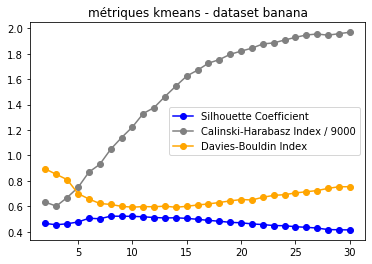

In [40]:
#data_6
#objectif : 2
l_clusters_to_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]
data_points = liste_points(data_6)
m = calcul_metriques_kmeans(l_clusters_to_test, data_points, 9000)
print_metriques(m, l_clusters_to_test, "métriques kmeans - dataset banana")

### graphes k-means

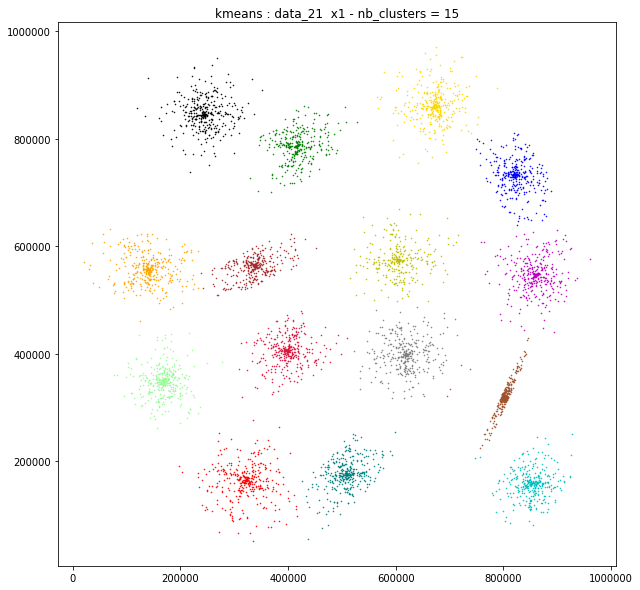

Temps d execution : 0.891315221786499 secondes ---


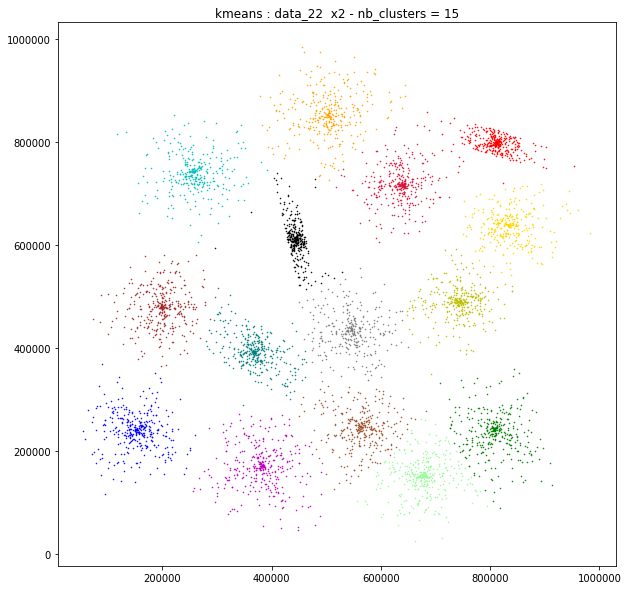

Temps d execution : 1.226686716079712 secondes ---


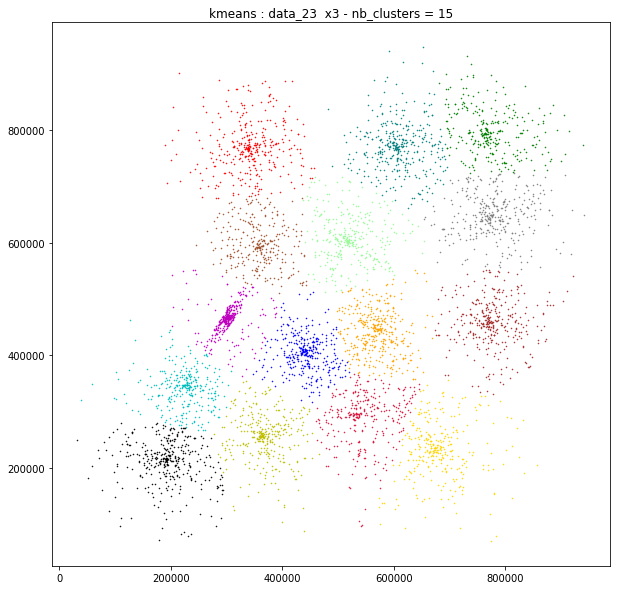

Temps d execution : 1.5042757987976074 secondes ---


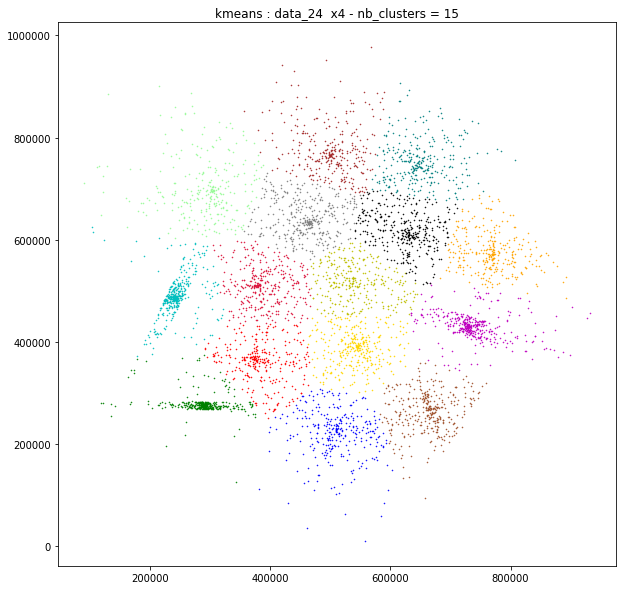

Temps d execution : 1.5576496124267578 secondes ---


In [41]:
selected_kmeans = [21,22,23,24]
apply_kmeans(selected_kmeans)

### applications à y1


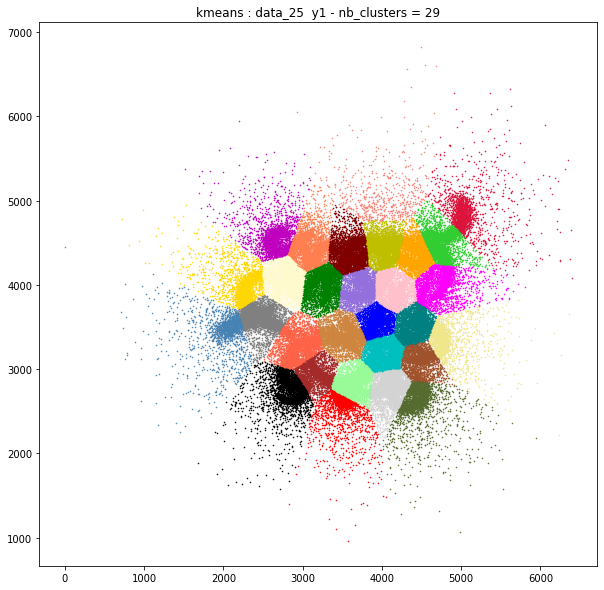

Temps d execution : 15.141339778900146 secondes ---


In [42]:
selected_kmeans = [25]
apply_kmeans(selected_kmeans)

In [43]:
selected_agglo = [25]
#apply_aggloClust(selected_agglo)
# !!! epuise la RAM !!!

bruit


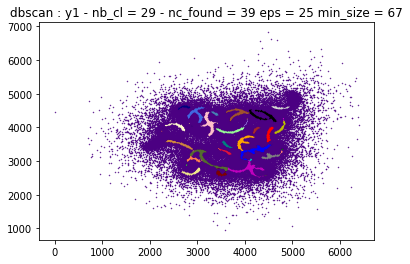

Temps d execution : 5.747082471847534 secondes ---


In [44]:
list_data["data_25"]=("y1", data_25, 29,25,67)
# 50 250 --> 3 
# 25 67 --> 2 sec
selected_dbscan = [25]
apply_dbscan()

In [45]:
list_data["data_25"]=("y1", data_25, 29,25,150)
# 67 --> 6 sec

# 200 19 clu
# 150 23 clu --> 8 sec
selected_hdbscan = [25]
apply_hdbscan()

KeyboardInterrupt: 

## Jeu de données réelles : balance-scale

In [ ]:
#data_32

### k-means

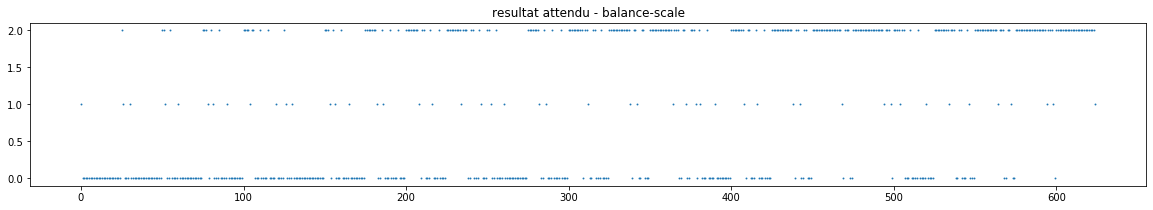

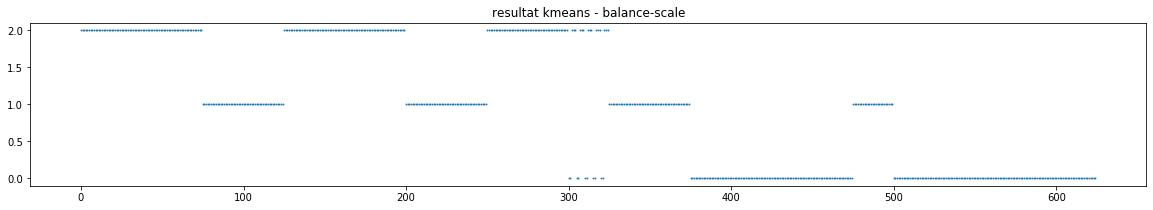

In [46]:
liste_originale = extract_clusters(data_32)

length = len(data_32[0]['left-weight'])

liste_pts = []
for i in range(0, length):
  x = data_32[0]['left-weight'][i]
  y = data_32[0]['left-distance'][i]
  z = data_32[0]['right-weight'][i]
  a = data_32[0]['right-distance'][i]
  liste_pts.append([x,y,z,a])

kmeans = KMeans(n_clusters=3, random_state=0)
result_list_kmeans = kmeans.fit_predict(liste_pts)

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), liste_originale, marker='o', s=0.8)
plt.title("resultat attendu - balance-scale")
plt.show()

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), result_list_kmeans, marker='o', s=0.8)
plt.title("resultat kmeans - balance-scale")
plt.show()



### agglomerative clutering

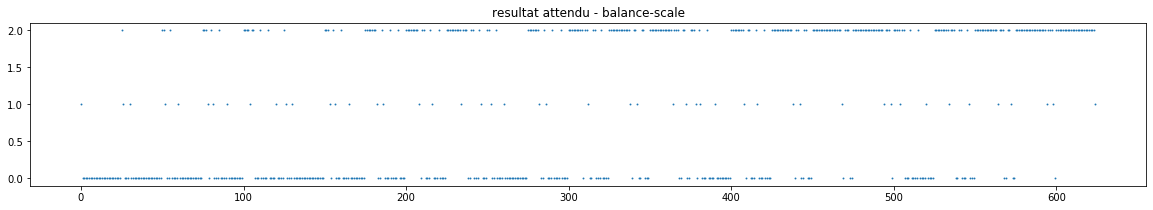

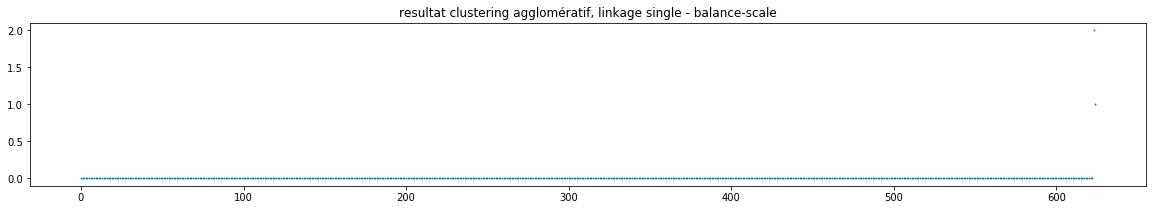

In [47]:
type_linkage=['ward', 'complete', 'average', 'single']
aggloClust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=type_linkage[3])
result_list_agglo = aggloClust.fit_predict(liste_pts)

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), liste_originale, marker='o', s=0.8)
plt.title("resultat attendu - balance-scale")
plt.show()

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), result_list_agglo, marker='o', s=0.8)
plt.title("resultat clustering agglomératif, linkage single - balance-scale")
plt.show()



### dbscan

bruit
1


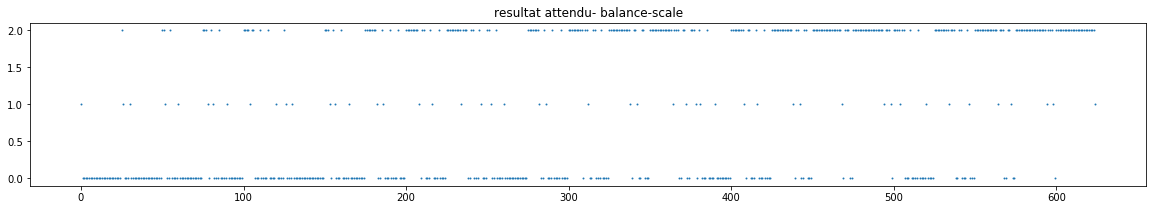

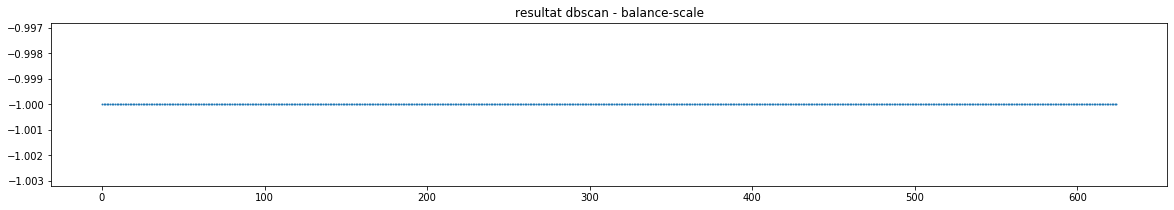

In [48]:
gap = 0.02
min_size = 20 #environ 49 points pour le cluster B "équilibre"

data_points = liste_pts
size = len(data_points)

dbscan_model = DBSCAN(eps=gap, min_samples=min_size)
result_list_dbscan = dbscan_model.fit_predict(data_points)

nb_clusters = max(result_list_dbscan) + 1
noise_exist = (min(result_list_dbscan) == -1)

if noise_exist:
  nb_clusters+=1
  print("bruit")

print(nb_clusters)

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), liste_originale, marker='o', s=0.9)
plt.title("resultat attendu- balance-scale")
plt.show()

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), result_list_dbscan, marker='o', s=0.9)
plt.title("resultat dbscan - balance-scale")
plt.show()



### hdbscan

bruit
1


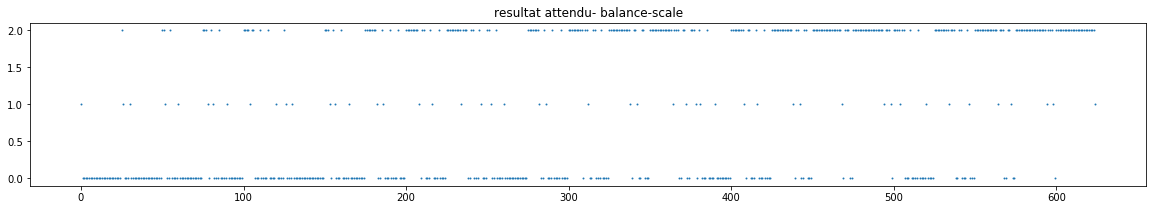

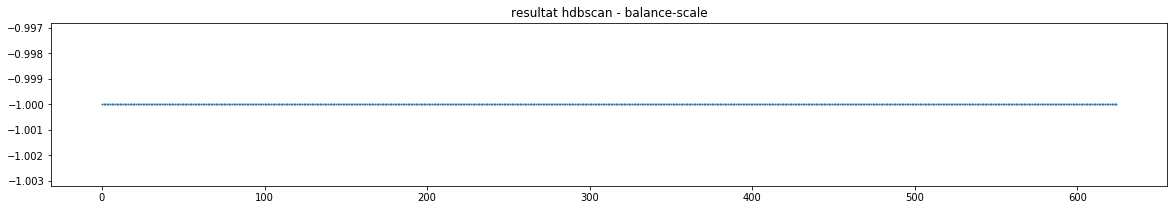

In [49]:
#environ 49 points pour le cluster B "équilibre"

data_points = liste_pts
size = len(data_points)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size= 7)
result_list_hdbscan = dbscan_model.fit_predict(data_points)

nb_clusters = max(result_list_hdbscan) + 1
noise_exist = (min(result_list_hdbscan) == -1)

if noise_exist:
  nb_clusters+=1
  print("bruit")

print(nb_clusters)

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), liste_originale, marker='o', s=0.9)
plt.title("resultat attendu- balance-scale")
plt.show()

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), result_list_hdbscan, marker='o', s=0.9)
plt.title("resultat hdbscan - balance-scale")
plt.show()

### Decision Tree

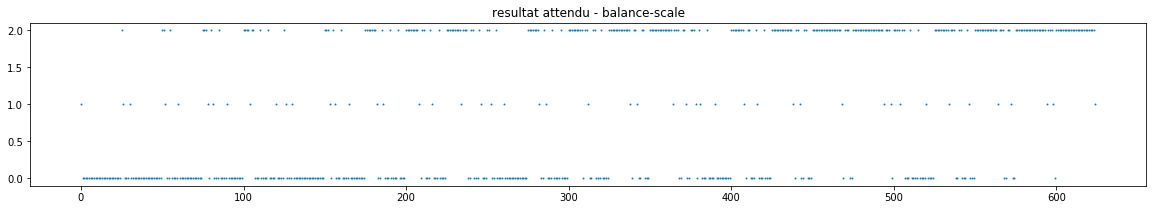

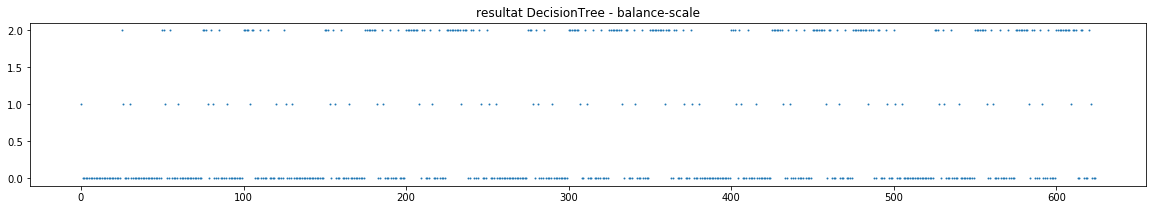

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

liste_train = liste_pts[:250]
liste_obj = liste_originale[:250]

model = DecisionTreeClassifier()
model.fit(liste_train,liste_obj)


Y_hat = model.predict(liste_pts)
#Y_prob = model.predict_proba(liste_points)
Y_hat

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), liste_originale, marker='o', s=0.9)
plt.title("resultat attendu - balance-scale")
plt.show()

plt.figure(figsize = (20, 3))
plt.scatter(range(0, length), Y_hat, marker='o', s=0.9)
plt.title("resultat DecisionTree - balance-scale")
plt.show()

